In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
titanic=pd.read_csv("../titanic/train.csv")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


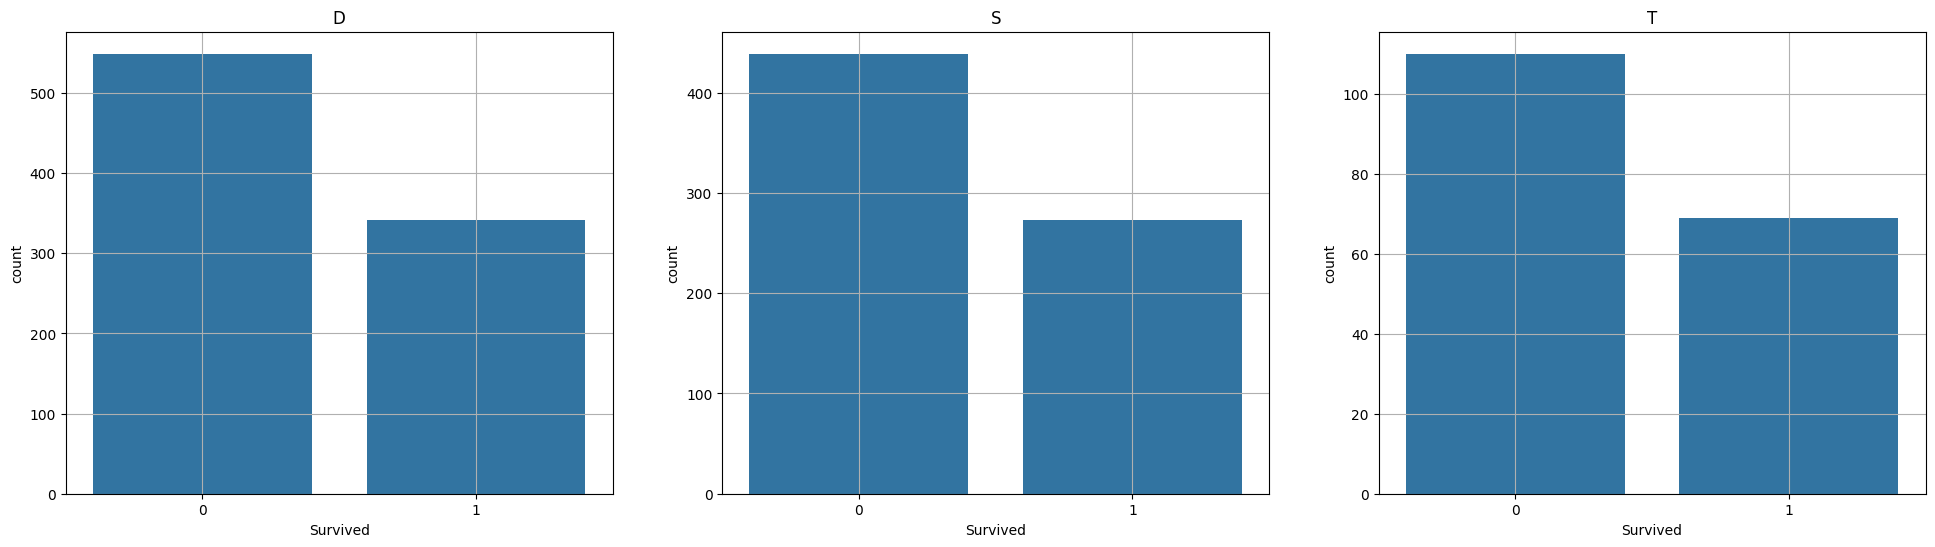

In [2]:
from sklearn import model_selection as mod
S,T=mod.train_test_split(titanic,test_size=0.2,stratify=titanic["Survived"])

_,a=plt.subplots(1,3,figsize=(24,6))
ziped_=zip(a,[titanic,S,T],['D','S','T'])
for zip_ in ziped_:
    sb.countplot(data=zip_[1],x="Survived",ax=zip_[0])
    zip_[0].grid()
    zip_[0].set_title(zip_[2])
plt.show()
plt.close()

In [3]:
Groups=mod.StratifiedKFold(n_splits=10)
kfold_groups=[]
for _ in range(10):
    splited_groups=Groups.split(X=titanic,y=titanic["Survived"])
    sub_groups=[]
    for group in splited_groups:
        group=(titanic.loc[group[0]],titanic.loc[group[1]])
        sub_groups.append(group)
    kfold_groups.append(sub_groups)

print("p 차 : ",len(kfold_groups))
print("k 차 : ",len(kfold_groups[0]))
print("S,T 샘플 개수 : ",(len(kfold_groups[0][0][0]),len(kfold_groups[0][0][1])))


p 차 :  10
k 차 :  10
S,T 샘플 개수 :  (801, 90)


In [4]:
Loocv=mod.KFold(n_splits=len(titanic))
loocv_groups=[]
for group in Loocv.split(X=titanic):
    loocv_groups.append((titanic.loc[group[0]],titanic.loc[group[1]]))
print("부분집합 총 개수 :",len(loocv_groups))
print("S,T 샘플 개수 : ",(len(loocv_groups[0][0]),len(loocv_groups[0][1])))

부분집합 총 개수 : 891
S,T 샘플 개수 :  (890, 1)


In [5]:
from sklearn import utils as uti
D0=uti.resample(titanic,n_samples=len(titanic))
D1=titanic.loc[titanic.index.drop(D0.index)]
print("D/D' : ",len(D1)/len(titanic))

D/D' :  0.37037037037037035


In [6]:
from sklearn import linear_model as lin
from sklearn import model_selection as mod
from sklearn import metrics as met

temp_df=titanic.dropna(axis=0,subset=["Age","Fare"]).reset_index().drop(columns="index")
model=lin.LinearRegression()
Loocv=mod.KFold(n_splits=len(temp_df))

loocv_model_performance=[]
for group in Loocv.split(X=temp_df):
    train_X=temp_df.loc[group[0]]["Age"].values.reshape(-1,1)
    train_y=temp_df.loc[group[0]]["Fare"].values.reshape(-1,1)
    
    model.fit(X=train_X,y=train_y)

    test_X=temp_df.loc[group[1]]["Age"].values.reshape(-1,1)
    test_y=temp_df.loc[group[1]]["Fare"].values.reshape(-1,1)

    score=met.mean_squared_error(y_true=test_y,y_pred=model.predict(test_X))
    loocv_model_performance.append(score)

mean_test_score=sum(loocv_model_performance)/len(loocv_model_performance)
print("Test_Error(MSE) : ",mean_test_score)

Test_Error(MSE) :  2783.9562703481834


In [7]:
sum(loocv_model_performance)/len(loocv_model_performance)

2783.9562703481834

In [8]:
from sklearn import tree as tre
from sklearn import model_selection as mod
from sklearn import metrics as met

temp_df=titanic.dropna(axis=0,subset=["Age","Fare","Survived"]).reset_index().drop(columns="index")
model=tre.DecisionTreeClassifier(max_depth=5)
Loocv=mod.KFold(n_splits=len(temp_df))

loocv_model_performance=[]
for group in Loocv.split(X=temp_df):
    train_X=temp_df.loc[group[0]][["Age","Fare"]]
    train_y=temp_df.loc[group[0]][["Survived"]]
    
    model.fit(X=train_X,y=train_y)

    test_X=temp_df.loc[group[1]][["Age","Fare"]]
    test_y=temp_df.loc[group[1]][["Survived"]]

    score=met.accuracy_score(y_true=test_y,y_pred=model.predict(test_X))
    loocv_model_performance.append(score)

mean_test_score=sum(loocv_model_performance)/len(loocv_model_performance)
print("Test_Error(Accuracy) : ",mean_test_score)

Test_Error(Accuracy) :  0.6876750700280112


In [9]:
from sklearn import linear_model as lin
from sklearn import model_selection as mod
from sklearn import metrics as met
from sklearn import dummy as dum

temp_df=titanic.dropna(axis=0,subset=["Age","Fare","Survived"]).reset_index().drop(columns="index")
model=dum.DummyClassifier(strategy="most_frequent")
Loocv=mod.KFold(n_splits=len(temp_df))

loocv_model_performance=[]
for group in Loocv.split(X=temp_df):
    train_X=temp_df.loc[group[0]][["Age","Fare"]]
    train_y=temp_df.loc[group[0]][["Survived"]]
    
    model.fit(X=train_X,y=train_y)

    test_X=temp_df.loc[group[1]][["Age","Fare"]]
    test_y=temp_df.loc[group[1]][["Survived"]]

    score=met.accuracy_score(y_true=test_y,y_pred=model.predict(test_X))
    loocv_model_performance.append(score)

mean_test_score=sum(loocv_model_performance)/len(loocv_model_performance)
print("Test_Error(Accuracy) : ",mean_test_score)

Test_Error(Accuracy) :  0.5938375350140056


In [10]:
model.fit(temp_df[["Age","Fare"]],temp_df["Survived"])

DummyClassifier(strategy='most_frequent')

In [11]:
met.accuracy_score(y_pred=model.predict(temp_df[["Age","Fare"]]),y_true=temp_df["Survived"])

0.5938375350140056

In [12]:
from sklearn import dummy as dum
from sklearn import tree as tre
from sklearn import pipeline as pip
from sklearn import preprocessing as pre
from sklearn import metrics as met

temp_df=titanic.dropna(axis=0,subset=["Age","Fare","Survived"]).reset_index().drop(columns="index")

X=temp_df[["Age","Fare"]]
y=temp_df[["Survived"]]

dummy=dum.DummyClassifier(strategy="most_frequent")
dummy.fit(X=X,y=y)

dummy_acc=met.accuracy_score(y_pred=dummy.predict(X),y_true=y)

print("Test_Error(Accuracy):",dummy_acc)

Test_Error(Accuracy): 0.5938375350140056


In [13]:
from sklearn import tree as tre
from sklearn import model_selection as mod
from sklearn import metrics as met

temp_df=titanic.dropna(axis=0,subset=["Age","Fare","Survived"]).reset_index().drop(columns="index")
model=tre.DecisionTreeClassifier(max_depth=5)
train_df,test_df=mod.train_test_split(temp_df,test_size=0.2,random_state=1,stratify=temp_df["Survived"])


train_X,train_y=train_df[["Age","Fare"]],train_df["Survived"]
test_X,test_y=test_df[["Age","Fare"]],test_df["Survived"]

model.fit(X=train_X,y=train_y)

pred_y=model.predict(test_X)

Confusion_matrix=met.confusion_matrix(y_true=test_y,y_pred=pred_y)
Precision=met.precision_score(y_true=test_y,y_pred=pred_y)
Recall=met.recall_score(y_true=test_y,y_pred=pred_y)

print("Confusion_Matrix \n ----------\n",Confusion_matrix,"\n-----------")
print("Precision :",Precision)
print("Recall :",Recall)

Confusion_Matrix 
 ----------
 [[78  7]
 [39 19]] 
-----------
Precision : 0.7307692307692307
Recall : 0.3275862068965517


In [14]:
direct_Precision=Confusion_matrix[1][1]/(Confusion_matrix[0][1]+Confusion_matrix[1][1])
direct_Recall=Confusion_matrix[1][1]/(Confusion_matrix[1][0]+Confusion_matrix[1][1])

print("Precision :",direct_Precision)
print("Recall :",direct_Recall)

Precision : 0.7307692307692307
Recall : 0.3275862068965517


In [15]:
proba_=model.predict_proba(test_X)
true_score=[value[1] for value in proba_]

temp=list(enumerate(true_score))
temp.sort(reverse=True,key=lambda x:x[1])
sort_index,sort_score=[x[0] for x in temp],[x[1] for x in temp]

vis_X=test_X.iloc[sort_index]
vis_y=test_y.iloc[sort_index]

precision,recall,therehold=met.precision_recall_curve(vis_y,sort_score)

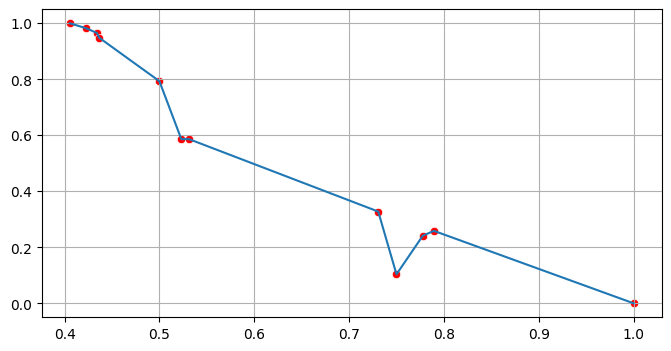

In [16]:
from matplotlib import pyplot as plt
import seaborn as sb

proba_=model.predict_proba(test_X)
true_score=[value[1] for value in proba_]

temp=list(enumerate(true_score))
temp.sort(reverse=True,key=lambda x:x[1])
sort_index,sort_score=[x[0] for x in temp],[x[1] for x in temp]

vis_X=test_X.iloc[sort_index]
vis_y=test_y.iloc[sort_index]

precision,recall,therehold=met.precision_recall_curve(vis_y,sort_score)

plt.figure(figsize=(8,4))
sb.lineplot(x=precision,y=recall)
sb.scatterplot(x=precision,y=recall,color="red")
plt.grid()
plt.show()

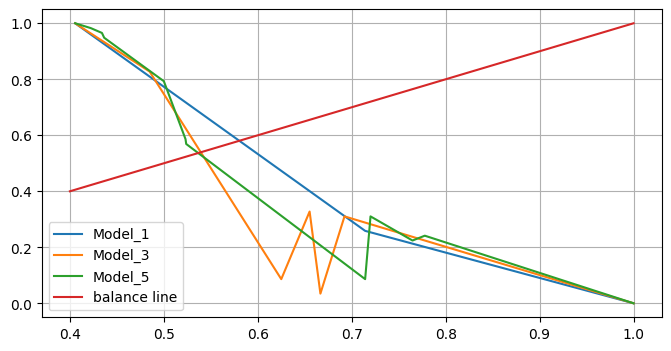

In [17]:
from sklearn import tree as tre
from sklearn import model_selection as mod
from sklearn import metrics as met
import numpy as np

temp_df=titanic.dropna(axis=0,subset=["Age","Fare","Survived"]).reset_index().drop(columns="index")
train_df,test_df=mod.train_test_split(temp_df,test_size=0.2,random_state=1,stratify=temp_df["Survived"])

model_1,model_3,model_5=(tre.DecisionTreeClassifier(max_depth=d) for d in [1,3,5]) 

train_X,train_y=train_df[["Age","Fare"]],train_df["Survived"]
test_X,test_y=test_df[["Age","Fare"]],test_df["Survived"]

for model in [model_1,model_3,model_5]:
    model.fit(X=train_X,y=train_y)

pred_y_1,pred_y_3,pred_y_5=(model.predict(test_X) for model in [model_1,model_3,model_5])

def pre_rec(model,test_X,test_y,*args):
    proba_=model.predict_proba(test_X)
    true_score=[value[1] for value in proba_]

    temp=list(enumerate(true_score))
    temp.sort(reverse=True,key=lambda x:x[1])
    sort_index,sort_score=[x[0] for x in temp],[x[1] for x in temp]

    vis_X=test_X.iloc[sort_index]
    vis_y=test_y.iloc[sort_index]

    precision,recall,therehold=met.precision_recall_curve(vis_y,sort_score)
    return precision,recall

pre_rec_list=dict(zip([f"Model_{i}" for i in [1,3,5]],[pre_rec(model,test_X,test_y) for model in [model_1,model_3,model_5]]))

plt.figure(figsize=(8,4))
for name in pre_rec_list:
    sb.lineplot(x=pre_rec_list[name][0],y=pre_rec_list[name][1],label=name)
sb.lineplot(x=np.linspace(0.4,1,10),y=np.linspace(0.4,1,10),label="balance line")
plt.grid()
plt.show()

In [18]:
Precision

0.7307692307692307

In [19]:
beta=1
direct_f1=(beta**2+1)*Precision*Recall/((beta**2)*Precision+Recall)
f1=met.fbeta_score(test_y,pred_y,beta=beta)

print("직접 구한 f1-score :",direct_f1)
print("f1-score :",f1)

직접 구한 f1-score : 0.4523809523809524
f1-score : 0.4523809523809524


In [20]:
met.fbeta_score(test_y,pred_y,beta=1)

0.4523809523809524

In [21]:
from sklearn import model_selection as mod
from sklearn import tree as tre
from sklearn import metrics as met

temp_df=titanic.dropna(axis=0,subset=["Age","Fare","Survived"]).reset_index().drop(columns="index")
model=tre.DecisionTreeClassifier(max_depth=5)

def kfold_metrics(n_splits:int,random_state:int,estimate,*args):    
    kfold_set=mod.StratifiedKFold(n_splits=n_splits,random_state=random_state,shuffle=True)
    sub_=kfold_set.split(X=temp_df,y=temp_df["Survived"])

    result={key:list() for key in ["P","R","CM"]}

    for sub in sub_:
        train_X,train_y=temp_df.loc[sub[0],["Age","Fare"]],temp_df.loc[sub[0],["Survived"]]
        test_X,test_y=temp_df.loc[sub[1],["Age","Fare"]],temp_df.loc[sub[1],["Survived"]]

        estimate.fit(X=train_X,y=train_y)

        P=met.precision_score(y_true=test_y,y_pred=estimate.predict(test_X))
        R=met.recall_score(y_true=test_y,y_pred=estimate.predict(test_X))
        M=met.confusion_matrix(y_true=test_y,y_pred=estimate.predict(test_X))

        result["P"].append(P)
        result["R"].append(R)
        result["CM"].append(M)
    return result

folds_result={key:list() for key in ["P","R","CM"]}
for rand in range(10):
    sub=kfold_metrics(10,rand,model)
    folds_result['P'].extend(sub["P"])
    folds_result['R'].extend(sub["R"])
    folds_result['CM'].extend(sub["CM"])

In [22]:
m=len(folds_result["P"])
beta=1
MP,MR=sum(folds_result["P"])/m,sum(folds_result["R"])/m
print("Macro-P:",MP)
print("Macro-R:",MR)
print("Macro-F1:",(1+beta**2)*MP*MR/((beta*2)*MP+MR))

Macro-P: 0.6559792512252465
Macro-R: 0.41620689655172444
Macro-F1: 0.3159687012741001


In [23]:
bar_conf={key:list() for key in ["tp","fp","tn","fn"]}
for matrix in folds_result["CM"]:
    bar_conf["tp"].append(matrix[1][1])
    bar_conf["fp"].append(matrix[0][1])
    bar_conf["tn"].append(matrix[0][0])
    bar_conf["fn"].append(matrix[1][0])

In [24]:
bar_tp=sum(bar_conf["tp"])
bar_fn=sum(bar_conf["fn"])
bar_fp=sum(bar_conf["fn"])

micro_p=bar_tp/(bar_tp+bar_fp)
micro_r=bar_tp/(bar_tp+bar_fn)
micro_f1=2*micro_p*micro_r/(micro_p+micro_r)

print("Micro-P :",micro_p)
print("Micro-R :",micro_r)
print("Micro-F1 :",micro_f1)

Micro-P : 0.41620689655172416
Micro-R : 0.41620689655172416
Micro-F1 : 0.4162068965517242


In [25]:
p=bar_conf["tp"][0]/(bar_conf["tp"][0]+bar_conf["fp"][0])
r=bar_conf["tp"][0]/(bar_conf["fn"][0]+bar_conf["tp"][0])

print("계산한 P :",p)
print("계산한 R :",r)

print("P :",folds_result["P"][0])
print("R :",folds_result["R"][0])

계산한 P : 0.5333333333333333
계산한 R : 0.27586206896551724
P : 0.5333333333333333
R : 0.27586206896551724


In [26]:
from sklearn import tree as tre
from sklearn import model_selection as mod
from sklearn import metrics as met

temp_df=titanic.dropna(axis=0,subset=["Age","Fare","Survived"]).reset_index().drop(columns="index")
model=tre.DecisionTreeClassifier(max_depth=5)
train_df,test_df=mod.train_test_split(temp_df,test_size=0.2,random_state=1,stratify=temp_df["Survived"])


train_X,train_y=train_df[["Age","Fare"]],train_df["Survived"]
test_X,test_y=test_df[["Age","Fare"]],test_df["Survived"]

model.fit(X=train_X,y=train_y)

pred_y=model.predict(test_X)

proba_=model.predict_proba(test_X)
true_score=[value[1] for value in proba_]

temp=list(enumerate(true_score))
temp.sort(reverse=False,key=lambda x:x[1])
sort_index,sort_score=[x[0] for x in temp],[x[1] for x in temp]

vis_X=test_X.iloc[sort_index]
vis_y=test_y.iloc[sort_index]

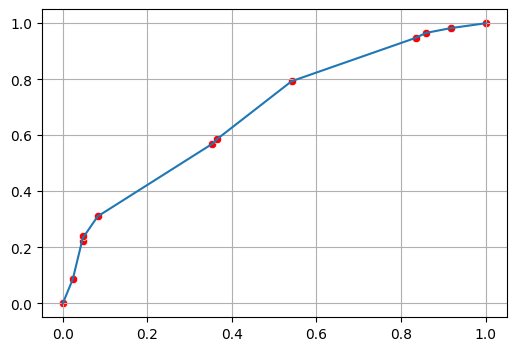

In [27]:
from matplotlib import pyplot as plt
import seaborn as sb

fpr,tpr,_=met.roc_curve(y_true=vis_y,y_score=sort_score)

plt.figure(figsize=(6,4))
sb.lineplot(x=fpr,y=tpr)
sb.scatterplot(x=fpr,y=tpr,color="red")
plt.grid()
plt.show()
plt.close()

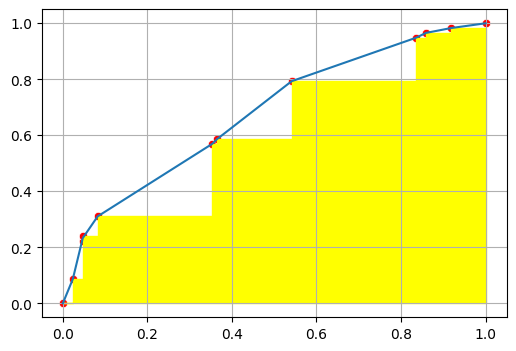

In [28]:
import numpy as np
from functools import partial
from matplotlib import pyplot as plt
import seaborn as sb

use_f=partial(np.linspace,num=10)

plt_X=[np.linspace(*fpr[i:i+2],num=10) for i in range(len(fpr)-1)]
plt_y=[[tpr[i] for _ in range(10)] for i in range(len(fpr)-1)]

x_=np.array(plt_X).ravel()
y_=np.array(plt_y).ravel()

fpr,tpr,_=met.roc_curve(y_true=vis_y,y_score=sort_score)

plt.figure(figsize=(6,4))
sb.lineplot(x=fpr,y=tpr)
sb.scatterplot(x=fpr,y=tpr,color="red")
plt.fill_between(x=x_,y1=y_,color="yellow",y2=0)
plt.grid()
plt.show()
plt.close()

In [29]:
from sklearn import metrics as met
auc=met.roc_auc_score(y_true=vis_y,y_score=sort_score)
ld=1-auc
print("AUC :",auc)
print("l_d :",ld)

AUC : 0.6794117647058823
l_d : 0.32058823529411773


In [30]:
folds_result["CM"][0]

array([[36,  7],
       [21,  8]])

In [31]:
cost_matrix=np.array([[0,10],[5,0]])

In [32]:
def cost_complex(confusion_matrix:np.array,cost_matrix:np.array):
    m=confusion_matrix.sum()
    zip_=zip(confusion_matrix.ravel(),cost_matrix.ravel())
    return sum([x*y for x,y in zip_])/m

cost_matrix=np.array([[0,10],[5,0]])

print("첫번째 혼동행렬 \n",folds_result["CM"][0])
print("----------")
print("비용행렬 \n",cost_matrix)
print("----------")
print("비용민감오차 :",cost_complex(folds_result["CM"][0],cost_matrix))

첫번째 혼동행렬 
 [[36  7]
 [21  8]]
----------
비용행렬 
 [[ 0 10]
 [ 5  0]]
----------
비용민감오차 : 2.4305555555555554


In [33]:
p=0.1
cf=np.array([[0,p],[1-p,0]])
cost_line=cost_complex(cf,cost_matrix)

In [34]:
cost_line

5.5

In [35]:
from sklearn import tree as tre
from sklearn import model_selection as mod
from sklearn import metrics as met
from matplotlib import pyplot as plt
import seaborn as sb
from numpy import linspace

temp_df=titanic.dropna(axis=0,subset=["Age","Fare","Survived"]).reset_index().drop(columns="index")
model=tre.DecisionTreeClassifier(max_depth=5)
train_df,test_df=mod.train_test_split(temp_df,test_size=0.2,random_state=1,stratify=temp_df["Survived"])


train_X,train_y=train_df[["Age","Fare"]],train_df["Survived"]
test_X,test_y=test_df[["Age","Fare"]],test_df["Survived"]

model.fit(X=train_X,y=train_y)

pred_y=model.predict(test_X)

proba_=model.predict_proba(test_X)
true_score=[value[1] for value in proba_]

temp=list(enumerate(true_score))
temp.sort(reverse=False,key=lambda x:x[1])
sort_index,sort_score=[x[0] for x in temp],[x[1] for x in temp]

vis_X=test_X.iloc[sort_index]
vis_y=test_y.iloc[sort_index]

fpr,tpr,_=met.roc_curve(y_true=vis_y,y_score=sort_score)
fnr=(1-tpr)

cost_matrix=np.array([[0,10],[5,0]])

ziped=zip(fpr,fnr)
lines=[]
for fpr,fnr in ziped:
    lines.append(linspace(fpr,fnr,10))


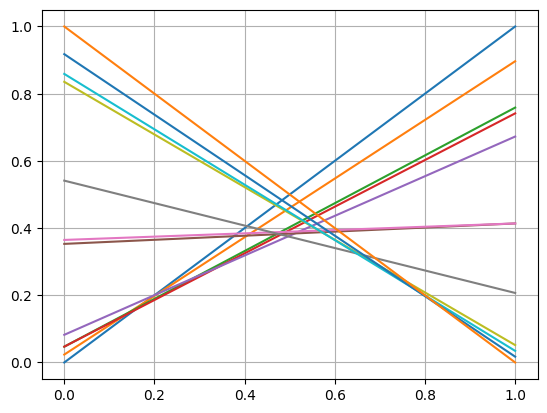

In [36]:
plt.figure()
for line in lines:
    sb.lineplot(y=line,x=linspace(0,1,10))
plt.grid()
plt.show()

In [37]:
import math
from numpy import linspace

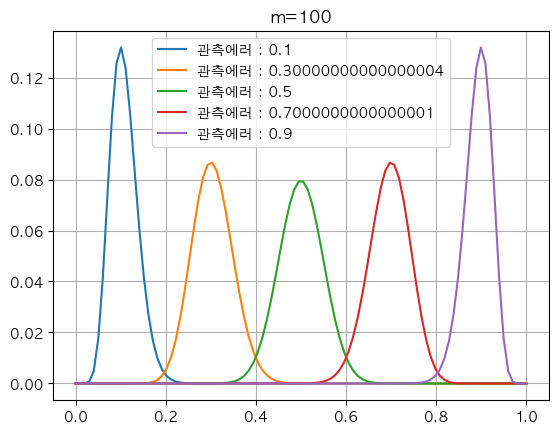

In [38]:
from matplotlib import pyplot as plt
import seaborn as sb
plt.rcParams["font.family"]="AppleGothic"

bar_eps_ls=linspace(0.1,0.9,5)
m=100
def p(m,x,bar_eps):
    comb=math.comb(m,int(m*bar_eps))
    num1=x**(int(m*bar_eps))
    num2=(1-x)**(m-int(m*bar_eps))
    return num1*num2*comb

plt.figure()
plt.title("m=100")
for bar_eps in bar_eps_ls:
    nums={x:p(m,x,bar_eps) for x in linspace(0,1,100)}
    sb.lineplot(x=nums.keys(),y=nums.values(),label=f"관측에러 : {bar_eps}")
plt.grid()
plt.show()
plt.close()

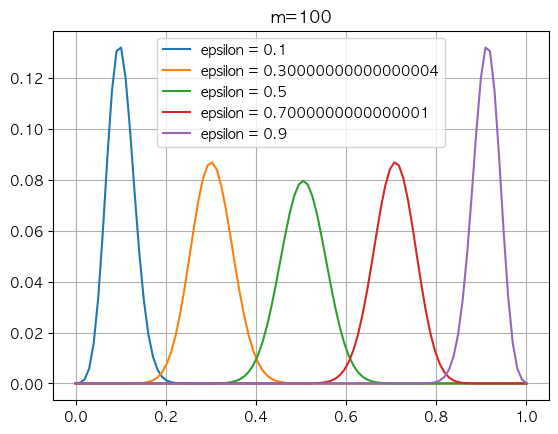

In [39]:
from matplotlib import pyplot as plt
import seaborn as sb
plt.rcParams["font.family"]="AppleGothic"

bar_eps_ls=linspace(0,1,100)
m=100
p=0.5

def P(m,p,bar_eps):
    comb=math.comb(m,int(m*bar_eps))
    num1=p**(int(m*bar_eps))
    num2=(1-p)**(m-int(m*bar_eps))
    return num1*num2*comb

plt.figure()
plt.title("m=100")
for p in linspace(0.1,0.9,5):
    p_result={bar_eps:P(m,p,bar_eps) for bar_eps in bar_eps_ls}
    sb.lineplot(x=p_result.keys(),y=p_result.values(),label=f'epsilon = {p}')
plt.grid()
plt.show()
plt.close()

In [40]:
from sklearn import linear_model as lin
from sklearn import model_selection as mod
from sklearn import pipeline as pip
from sklearn import compose as com
from sklearn import impute as imp
from sklearn import preprocessing as pre
import numpy as np

titanic_df=titanic.drop(columns=["PassengerId","Name","Ticket","Cabin"])
obj_col=titanic_df.dropna().select_dtypes("object").columns
num_col=titanic_df.dropna().select_dtypes(np.number).columns.difference(["Survived"])
label="Survived"

columns=titanic_df.columns.difference([label])

num_pip=pip.make_pipeline(imp.SimpleImputer(strategy="mean"),pre.StandardScaler())
obj_pip=pip.make_pipeline(imp.SimpleImputer(strategy="most_frequent"),pre.OneHotEncoder(drop="first",handle_unknown="ignore"))

total_pip=com.make_column_transformer((num_pip,num_col),(obj_pip,obj_col),remainder="passthrough")

train,test=mod.train_test_split(titanic_df,test_size=0.2,random_state=1,stratify=titanic_df[label])

model=pip.make_pipeline(total_pip,lin.LogisticRegression())

model.fit(X=train[columns],y=train[label])

print("사용한 column :",columns.values)
print("라벨 :",label)
print("사용한 모델 :",model.named_steps['logisticregression'].__class__)
model

사용한 column : ['Age' 'Embarked' 'Fare' 'Parch' 'Pclass' 'Sex' 'SibSp']
라벨 : Survived
사용한 모델 : <class 'sklearn.linear_model._logistic.LogisticRegression'>


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Sex', 'Embarked'], dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [41]:
from sklearn import dummy as dum
from sklearn import metrics as met
from scipy import stats as st
from scipy import optimize as opt
from functools import partial

processing_train=model.named_steps['columntransformer'].transform(X=train[columns])
dum_classifier=dum.DummyClassifier()
dum_classifier.fit(X=processing_train,y=train[label])

pred_y=model.predict(test[columns])
dum_y=dum_classifier.predict(test[columns])

model_acc=met.accuracy_score(y_true=test[label],y_pred=pred_y)
dummy_acc=met.accuracy_score(y_true=test[label],y_pred=dum_y)

print("테스트 오차율(모델) :",1-model_acc)
print("테스트 오차율(최빈값으로 찍기) :",1-dummy_acc)

error_rate=1-model_acc
m=len(test)
alpha=0.05
epsilon0=0.27

def bi_(epsilon,alpha=0.05):
    return st.binomtest(k=int(epsilon0*m),n=m,alternative="greater",p=epsilon).pvalue-alpha
bar_epsilon=opt.root_scalar(bi_,method='bisect',bracket=[0,1])

if bar_epsilon.converged:
    bar_epsilon=bar_epsilon.root

print('bar_epsilon :',bar_epsilon)
print(f"hypothesis : norm_epsilon < {epsilon0}")
print(f"검정결과 : 테스트 오차율 ({1-model_acc}) < 임계치 ({bar_epsilon}) 로 가설은 기각되지 않음.")

테스트 오차율(모델) : 0.2122905027932961
테스트 오차율(최빈값으로 찍기) : 0.3854748603351955
bar_epsilon : 0.21409716631933406
hypothesis : norm_epsilon < 0.27
검정결과 : 테스트 오차율 (0.2122905027932961) < 임계치 (0.21409716631933406) 로 가설은 기각되지 않음.


In [45]:
from matplotlib import pyplot as plt
import seaborn as sb

def P(m,p,eps0):
    comb=math.comb(m,int(m*bar_eps))
    num1=p**(int(m*bar_eps))
    num2=(1-p)**(m-int(m*bar_eps))
    return num1*num2*comb

bar_epsilon_curve=P(m,bar_epsilon,epsilon0)

plt.figure()
plt.title("임계치 곡선")
for p in linspace(0.1,0.9,5):
    p_result={bar_eps:P(m,bar_eps_ls,bar_eps) for bar_eps in bar_eps_ls}
    sb.lineplot(x=p_result.keys(),y=p_result.values(),label=f'epsilon = {p}')
plt.grid()
plt.show()
plt.close()


In [46]:
bar_epsilon

0.21409716631933406

In [43]:
st.binomtest(k=int(epsilon0*m),n=m,alternative="greater",p=0.21409716631933406)

BinomTestResult(k=48, n=179, alternative='greater', statistic=0.2681564245810056, pvalue=0.049999999996138314)

In [44]:
st.binomtest(k=int(epsilon0*m),n=m,alternative="greater",p=0.22)

BinomTestResult(k=48, n=179, alternative='greater', statistic=0.2681564245810056, pvalue=0.07378629791050054)

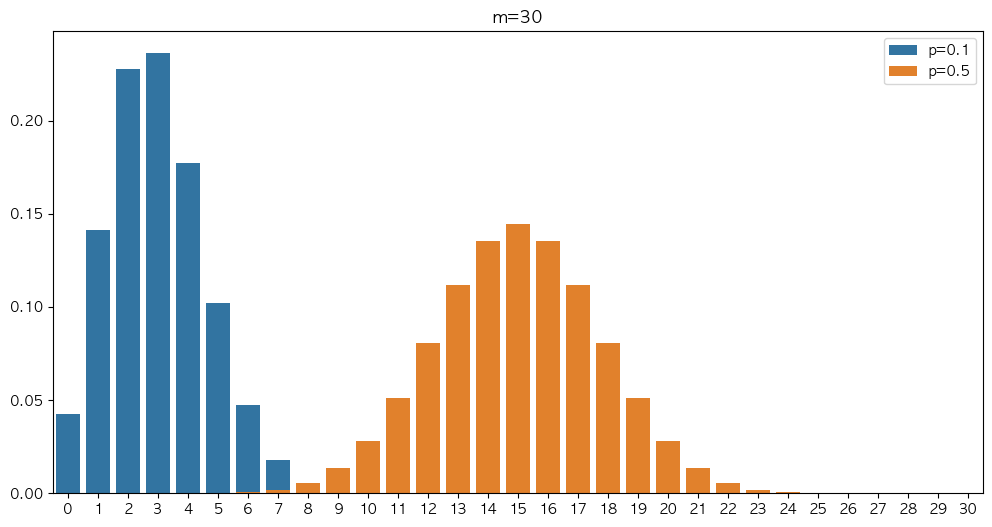

In [90]:
from numpy import linspace
from math import comb
from matplotlib import pyplot as plt
import seaborn as sb

def P(m,p):
        return {int(k):comb(m,int(k))*(p**k)*((1-p)**(m-k)) for k in linspace(0,m,m+1)}

m=30
p_s=[0.1,0.5]

plt.figure(figsize=(12,6))
plt.title("m=30")
for p in p_s:
    P_=P(m,p)
    sb.barplot(x=P_.keys(),y=P_.values(),label=f"p={p}")
plt.show()
plt.close()

In [84]:
def max_epsilon(m,p,epsilon0):
    
    min_start=int(epsilon0*m)
    binary_=P(m,p)
    return {key:binary_[key] for key in binary_ if key>min_start}

<Axes: >

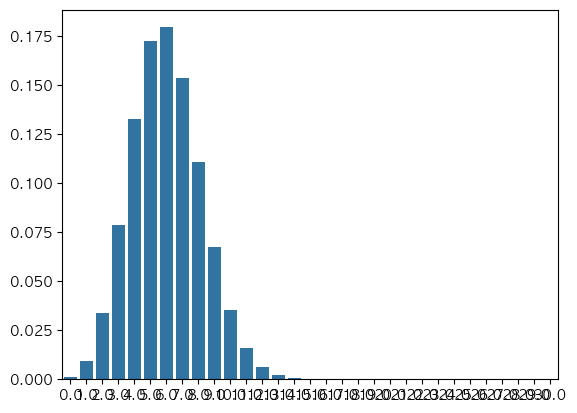

In [70]:
test=P(30,0.2)
sb.barplot(x=test.keys(),y=test.values())

In [80]:
sum(max_epsilon(30,0.2,0.1).values())

0.8772891936058381